<a href="https://colab.research.google.com/github/LeoD-h/Project-BCI-EEG/blob/main/DiscoverDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Début 22/11

In [1]:
# Installation forcée des versions compatibles
# On installe moabb et on force scikit-learn en version 1.5.2 pour éviter le bug
!pip install moabb mne scikit-learn==1.5.2 numpy matplotlib

INFO: pip is looking at multiple versions of moabb to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 147.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.3/252.3 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.7/127.7 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 14.3 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.5.0
    Uninstalling urllib3-2.5.0:
      Successfully unin

1. Téléchargement du dataset (Patientez... cela peut prendre 1 à 2 min)...
2. Préparation des données...

✅ VICTOIRE ! On a récupéré 288 essais.
Chaque essai dure 1001 points de temps sur 22 électrodes.

3. Affichage du signal...


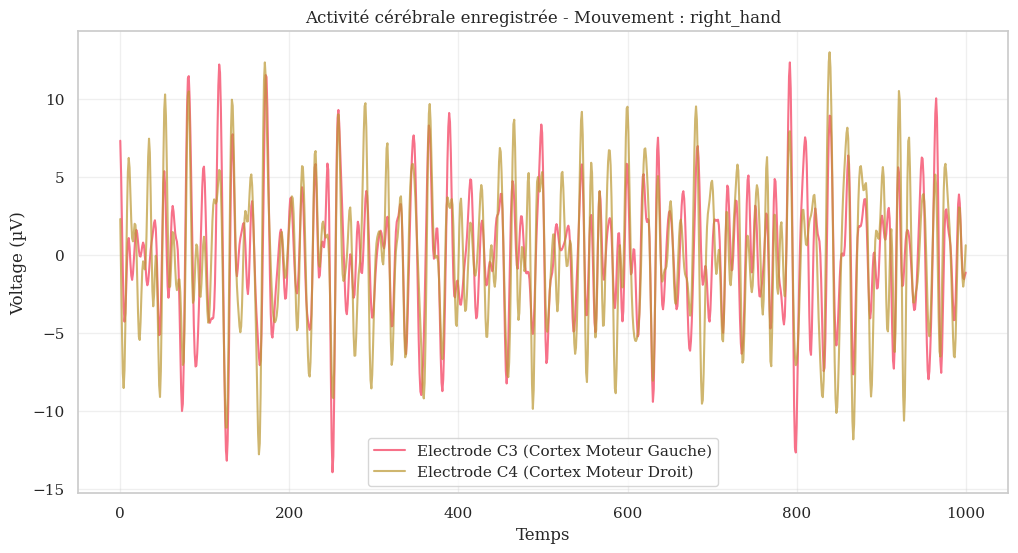

In [3]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
from moabb.datasets import BNCI2014001
from moabb.paradigms import MotorImagery
import mne

# On cache les messages rouges qui font peur pour rien
mne.set_log_level('WARNING')
warnings.filterwarnings("ignore")

print("1. Téléchargement du dataset (Patientez... cela peut prendre 1 à 2 min)...")
# Note : Sans le Drive, il va le télécharger temporairement sur Colab.
dataset = BNCI2014001()

print("2. Préparation des données...")
# On demande : Mains gauche/droite, filtré entre 8-32 Hz
paradigm = MotorImagery(events=['left_hand', 'right_hand'], n_classes=2, fmin=8, fmax=32)
X, y, metadata = paradigm.get_data(dataset=dataset, subjects=[1])

print(f"\n✅ VICTOIRE ! On a récupéré {X.shape[0]} essais.")
print(f"Chaque essai dure {X.shape[2]} points de temps sur {X.shape[1]} électrodes.")

# 3. Visualisation
print("\n3. Affichage du signal...")
plt.figure(figsize=(12, 6))
plt.plot(X[0, 7, :], label='Electrode C3 (Cortex Moteur Gauche)')
plt.plot(X[0, 11, :], label='Electrode C4 (Cortex Moteur Droit)', alpha=0.7)
plt.title(f"Activité cérébrale enregistrée - Mouvement : {y[0]}")
plt.xlabel("Temps")
plt.ylabel("Voltage (µV)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

1. Connexion au Google Drive...
Mounted at /content/drive


   -> Stockage configuré sur : /content/drive/MyDrive/mne_data

2. Chargement du dataset...

3. Affichage comparatif (Essai 1 vs Essai 0)...


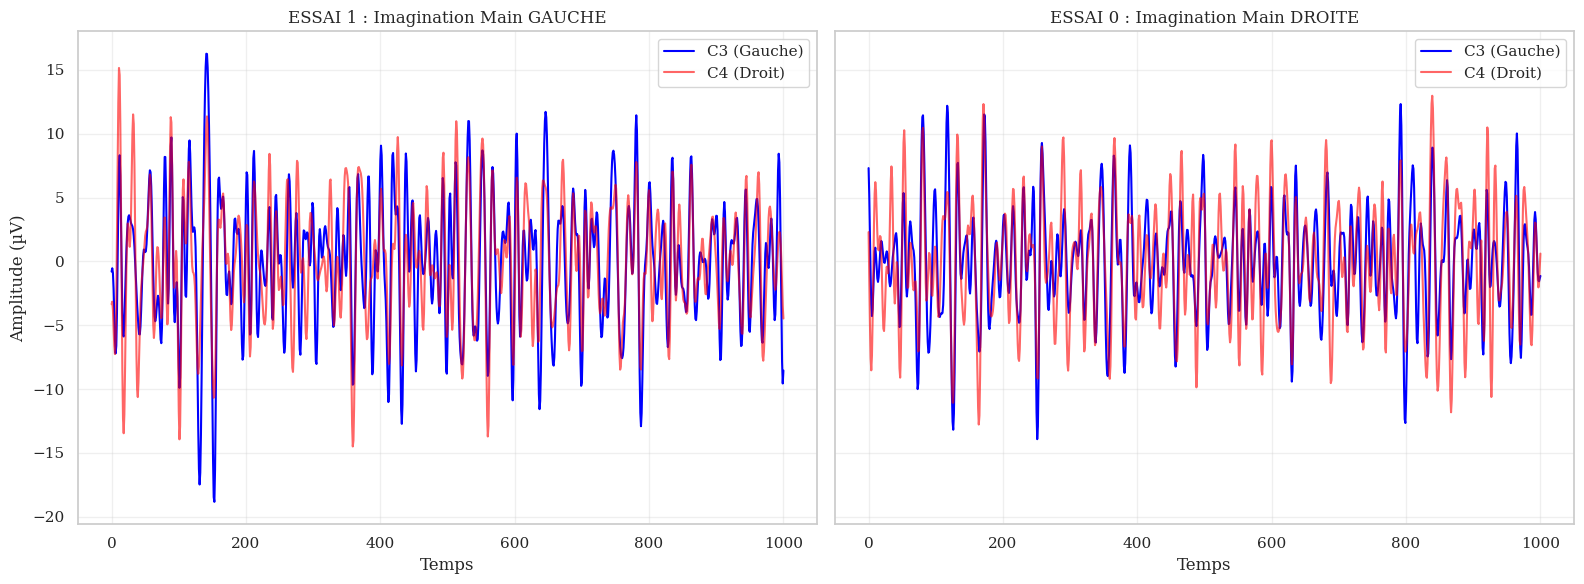

In [4]:
import os
import mne
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
from moabb.datasets import BNCI2014001
from moabb.paradigms import MotorImagery

# --- 1. SETUP GOOGLE DRIVE (Pour ne plus retélécharger) ---
print("1. Connexion au Google Drive...")
drive.mount('/content/drive')

# On force MNE à stocker les données dans ton Drive
drive_path = '/content/drive/MyDrive/mne_data'
if not os.path.exists(drive_path):
    os.makedirs(drive_path)
mne.set_config('MNE_DATA', drive_path)
print(f"   -> Stockage configuré sur : {drive_path}")

# --- 2. CHARGEMENT DES DONNÉES ---
print("\n2. Chargement du dataset...")
# Maintenant, il va regarder dans ton Drive avant de télécharger
dataset = BNCI2014001()
paradigm = MotorImagery(events=['left_hand', 'right_hand'], n_classes=2, fmin=8, fmax=32)
X, y, metadata = paradigm.get_data(dataset=dataset, subjects=[1])

# --- 3. RÉCUPÉRATION DES INDICES ---
# On cherche où sont les essais "main gauche" et "main droite" dans la liste y
indices_gauche = np.where(y == 'left_hand')[0]
indices_droite = np.where(y == 'right_hand')[0]

# On prend le premier exemple de chaque
idx_g = indices_gauche[0]
idx_d = indices_droite[0]

# --- 4. VISUALISATION COMPARATIVE (Plot double) ---
print(f"\n3. Affichage comparatif (Essai {idx_g} vs Essai {idx_d})...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Graphique 1 : Main Gauche
# On affiche C3 (Hémisphère Gauche) et C4 (Hémisphère Droit)
axes[0].plot(X[idx_g, 7, :], label='C3 (Gauche)', color='blue')
axes[0].plot(X[idx_g, 11, :], label='C4 (Droit)', color='red', alpha=0.6)
axes[0].set_title(f"ESSAI {idx_g} : Imagination Main GAUCHE")
axes[0].set_xlabel("Temps")
axes[0].set_ylabel("Amplitude (µV)")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Graphique 2 : Main Droite
axes[1].plot(X[idx_d, 7, :], label='C3 (Gauche)', color='blue')
axes[1].plot(X[idx_d, 11, :], label='C4 (Droit)', color='red', alpha=0.6)
axes[1].set_title(f"ESSAI {idx_d} : Imagination Main DROITE")
axes[1].set_xlabel("Temps")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()